<a href="https://colab.research.google.com/github/jong9810/TensorFlow-2.0/blob/main/5_2_CNN_Ex1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Ex1 : MNIST

### CNN 구조 (Feature Extractor and Classifier)
1. Feature Extractor (특징 추출기)
- Conv Layer(컨볼루션층)와 Pool Layer(풀링층)의 다양한 조합으로 구성되며, 이미지 데이터의 특징을 추출하고 압축하는 역할을 수행함

2. Classifier (분류기)
- 완전연결층인 Dense Layer와 과적합(overfitting)을 방지하기 위한 Dropout Layer 등의 다양한 조합으로 구성되며, 정답을 분류하는 역할을 수행함

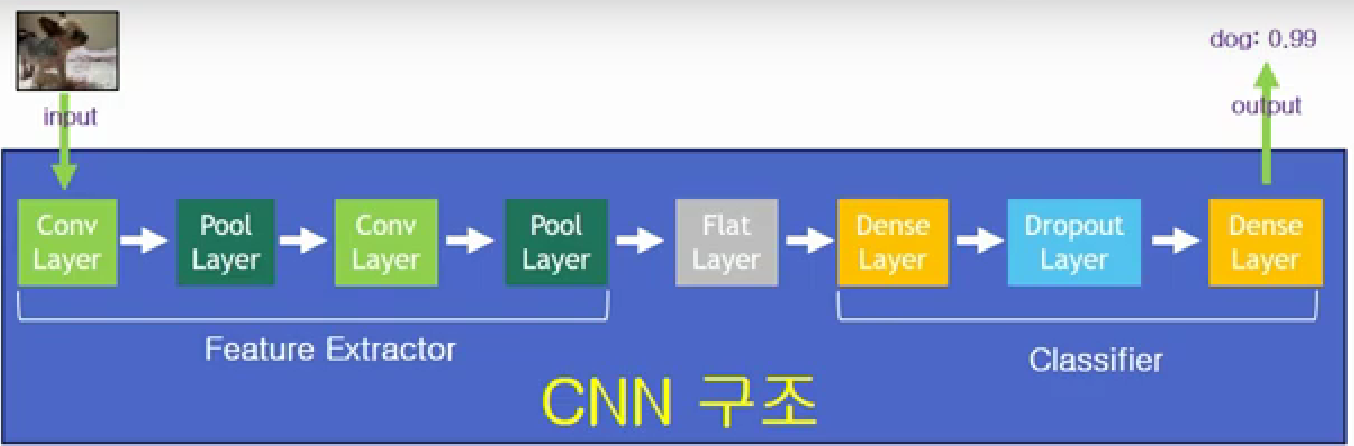

### CNN Feature Extractor TensorFlow API
1. Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, strides=(1,1), activation='relu', use_bias=True, padding='valid')
- CNN에서 첫 번째 Conv Layer을 나타내기 위해 (높이, 너비, 채널) 형태의 텐서로 주어지는 input_shape를 사용.
- 필터 크기(kernel_size)와 필터 개수(filters)는 반드시 지정해주어야함.
- 필터 크기는 (높이, 너비) 형태이며, 숫자 하나만 쓸 경우에는 높이와 너비가 동일하다고 판단.

2. Conv2D(kernel_size=(3,3), filters=32, strides=(1,1), activation='relu', use_bias=True, padding='valid')
- CNN에서 두 번째 이상의 Conv Layer을 나타냄 (input_shape가 사용되지 않음)
- 필터 크기와 필터 개수 값만 지정해주면 나머지 인자들은 첫 번째 Conv Layer에서 지정한 값을 사용하여 층을 구현함

3. MaxPool2D(pool_size=(2,2), padding='valid')
- 한번에 Max Pooling을 수행할 범위를 pool_size 에 지정.
- 예) pool_size=(2,2)이라면 높이 2, 너비 2 사각형 안에서 최대값만 남기는 연산을 반복 


### CNN Classifier TensorFlow API
1. Flat Layer
- Feature Extractor의 출력은 (높이, 너비, 채널)로 나타나는 3차원 텐서이므로, 완전연결층(Dense)과의 연결을 위해 3차원 텐서를 1차원 벡터로 만들어주는 역할을 수행함
- 예시) Flatten()

2. Dense Layer
- Dense 함수는 신경망에서 은닉층과 출력층을 의미하는 완전연결층을 나타내며, 첫 번째 인자(파라미터)는 완전연결층의 출력 노드 수이고, 활성화 함수는 activation 인자에 지정해줌
- 예시1) Dense(100, activation='relu')
- 예시2) Dense(100, activation='sigmoid')
- 예시3) Dense(10, activation='softmax')

3. Dropout Layer
- 학습 과정 중 rate에 지정된 비율만큼 랜덤하게 층과 층 사이의 연결을 끊어서 신경망의 과적합을 막는 역할을 수행함
- 예시) Dropout(rate=0.2)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

tf.__version__

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 입력 데이터 텐서로 변환 (높이, 너비, 채널)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print('x_train.shape =', x_train.shape, 't_train.shape =', t_train.shape)
print('x_test.shape =', x_test.shape, 't_test.shape =', t_test.shape)

In [ ]:
# 입력 데이터 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [ ]:
cnn = Sequential() # CNN 모델 객체 생성

# 모델 구축
# Features Extractor
cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu')) # 1st Conv Layer
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu')) # 2nd Conv Layer
cnn.add(MaxPool2D(pool_size=(2,2))) # Pool Layer
cnn.add(Dropout(0.25)) # Dropout Layer : pooling을 통해 나온 데이터를 25% 비율로 랜덤하게 끊어서 과적합 방지

# Classifier
cnn.add(Flatten()) # Flat Layer : 3차원 텐서를 1차원 벡터로 변환
cnn.add(Dense(128, activation='relu')) # 은닉층 개념
cnn.add(Dropout(0.5)) # Dropout Layer 
cnn.add(Dense(10, activation='softmax')) # 출력층

In [ ]:
from tensorflow.keras.optimizers import Adam

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
cnn.summary()

In [ ]:
hist = cnn.fit(x_train, t_train, batch_size=128, epochs=30, validation_data=(x_test, t_test))

In [ ]:
cnn.evaluate(x_test, t_test)

In [ ]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')

plt.legend(loc='best')
plt.show()

In [ ]:
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')

plt.legend(loc='best')
plt.show()

In [ ]:
# 생성된 모델을 가지고 임의의 데이터에 대한 예측
